In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# distanve
import gower

# 
import importlib
import utils
importlib.reload(utils)

# preprocessing tools
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler


# methods to remove
from sklearn.ensemble import IsolationForest

sns.set_palette('Set2')

# Preprocessing
- set proper types
- min max scale nonbinary columns -> already scaled

In [2]:
df_raw = pd.read_csv('Unsupervised Learning 23-24 - Project Dataset.csv', sep=';').iloc[:,1:-2]
df_raw.head()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,"0,750000",1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,"0,001132","0,080780","0,197324","0,300926","0,225000"
1,"0,239583",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,"0,000472","0,164345","0,235786","0,537037","0,165625"
2,"0,479167",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,"0,003585","0,130919","0,167224","0,527778","0,118750"
3,"0,656250",0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,"0,001698","0,091922","0,125418","0,337963","0,129688"
4,"0,229167",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,"0,000472","0,142061","0,229097","0,337963","0,235938"


In [3]:
df_raw.dtypes

Dim_0       object
Dim_1=0      int64
Dim_2=0      int64
Dim_3=0      int64
Dim_4=0      int64
Dim_5=0      int64
Dim_6=0      int64
Dim_7=0      int64
Dim_8=0      int64
Dim_9=0      int64
Dim_10=0     int64
Dim_11=0     int64
Dim_12=0     int64
Dim_13=0     int64
Dim_14=0     int64
Dim_15=0     int64
Dim_16      object
Dim_17      object
Dim_18      object
Dim_19      object
Dim_20      object
dtype: object

In [4]:
# transforming strings to floating point numbers
object_columns = df_raw.select_dtypes(include=['object']).columns
for column in object_columns:
    try:
        df_raw[column] = pd.to_numeric(df_raw[column].str.replace(',', '.'), errors='coerce')
    except ValueError:
        print(f"Conversion failed for column: {column}. It may contain non-numeric values.")

In [5]:
df_raw.head()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938


In [6]:
for column in df_raw:
    if column[-2:] == '=0':
        #print(column)
        print(df_raw[column].value_counts())

Dim_1=0
1    5009
0    2191
Name: count, dtype: int64
Dim_2=0
1    6260
0     940
Name: count, dtype: int64
Dim_3=0
1    7089
0     111
Name: count, dtype: int64
Dim_4=0
1    7108
0      92
Name: count, dtype: int64
Dim_5=0
1    6924
0     276
Name: count, dtype: int64
Dim_6=0
1    7122
0      78
Name: count, dtype: int64
Dim_7=0
1    7099
0     101
Name: count, dtype: int64
Dim_8=0
1    7079
0     121
Name: count, dtype: int64
Dim_9=0
1    6728
0     472
Name: count, dtype: int64
Dim_10=0
1    6705
0     495
Name: count, dtype: int64
Dim_11=0
1    7109
0      91
Name: count, dtype: int64
Dim_12=0
1    7141
0      59
Name: count, dtype: int64
Dim_13=0
1    7016
0     184
Name: count, dtype: int64
Dim_14=0
1    7199
0       1
Name: count, dtype: int64
Dim_15=0
1    6848
0     352
Name: count, dtype: int64


In [7]:
df_raw.describe()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
count,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,0.531790,0.695694,0.869444,0.984583,0.987222,0.961667,0.989167,0.985972,0.983194,0.934444,...,0.987361,0.991806,0.974444,0.999861,0.951111,0.009172,0.108506,0.179649,0.374250,0.173773
std,0.197156,0.460145,0.336937,0.123212,0.112322,0.192013,0.103525,0.117613,0.128551,0.247521,...,0.111718,0.090158,0.157816,0.011785,0.215651,0.043357,0.042001,0.060148,0.088354,0.056402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.001340,0.091922,0.145485,0.324074,0.145312
50%,0.562500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.003208,0.109192,0.175585,0.370370,0.170313
75%,0.687500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.005094,0.119777,0.205686,0.402778,0.195313
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
## dataset is already minmaxscaled
[(df_raw[c].min(), df_raw[c].max()) for c in df_raw.columns]

[(0.0, 1.0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 1),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0),
 (0.0, 1.0)]

In [9]:
df_raw.describe().iloc[2,:]

Dim_0       0.197156
Dim_1=0     0.460145
Dim_2=0     0.336937
Dim_3=0     0.123212
Dim_4=0     0.112322
Dim_5=0     0.192013
Dim_6=0     0.103525
Dim_7=0     0.117613
Dim_8=0     0.128551
Dim_9=0     0.247521
Dim_10=0    0.253046
Dim_11=0    0.111718
Dim_12=0    0.090158
Dim_13=0    0.157816
Dim_14=0    0.011785
Dim_15=0    0.215651
Dim_16      0.043357
Dim_17      0.042001
Dim_18      0.060148
Dim_19      0.088354
Dim_20      0.056402
Name: std, dtype: float64

In [10]:
np.sum(df_raw['Dim_16'] > 0.95)

1

In [12]:
scaler = RobustScaler()
scaler = StandardScaler()
df = df_raw.copy(deep=True)
cont = list(filter(lambda col: col[-2:] != '=0', df_raw.columns))
df[cont] = scaler.fit_transform(df_raw[cont])

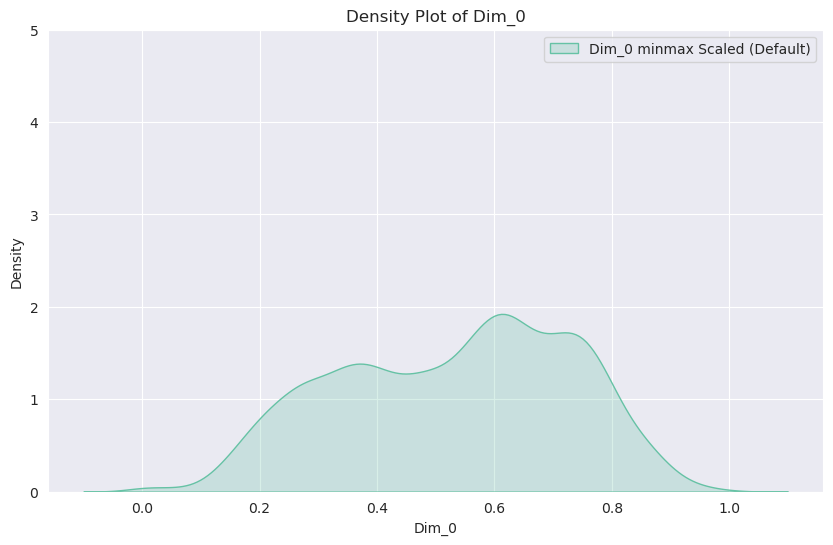

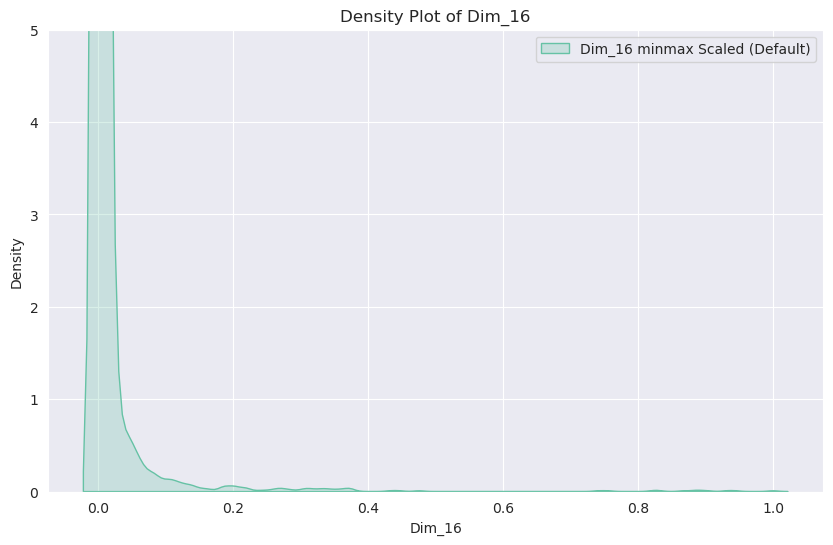

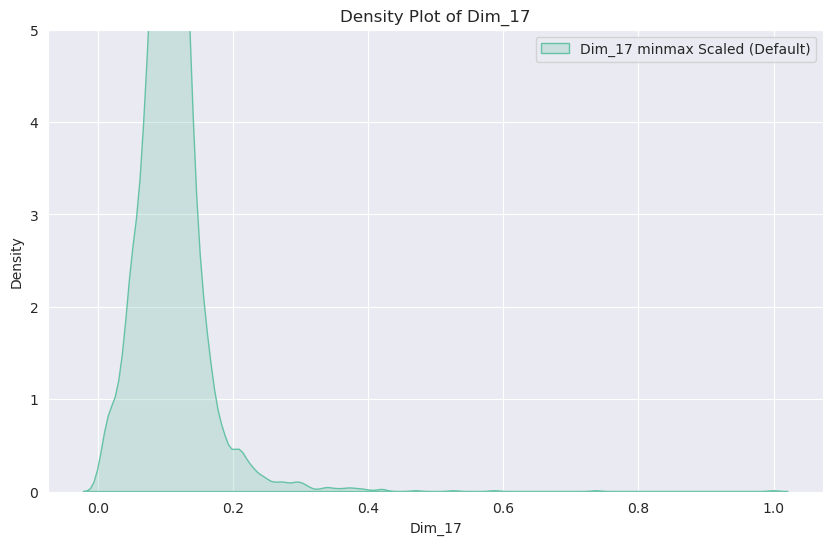

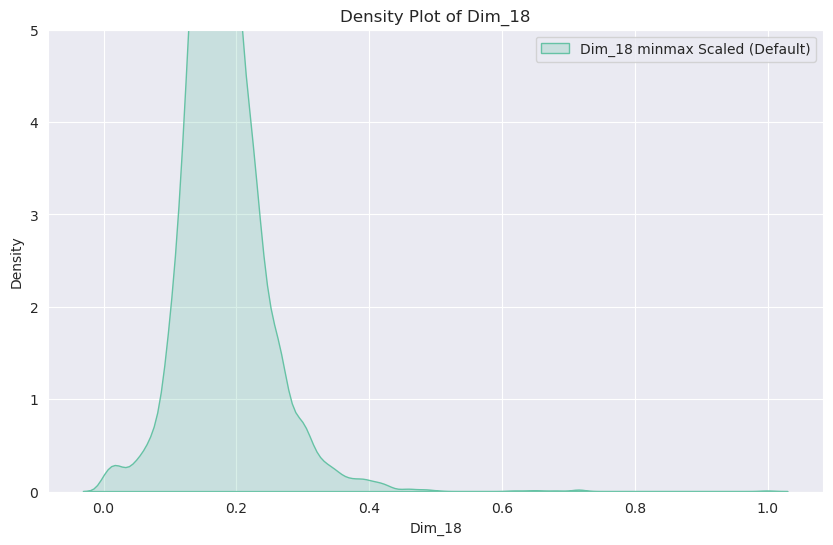

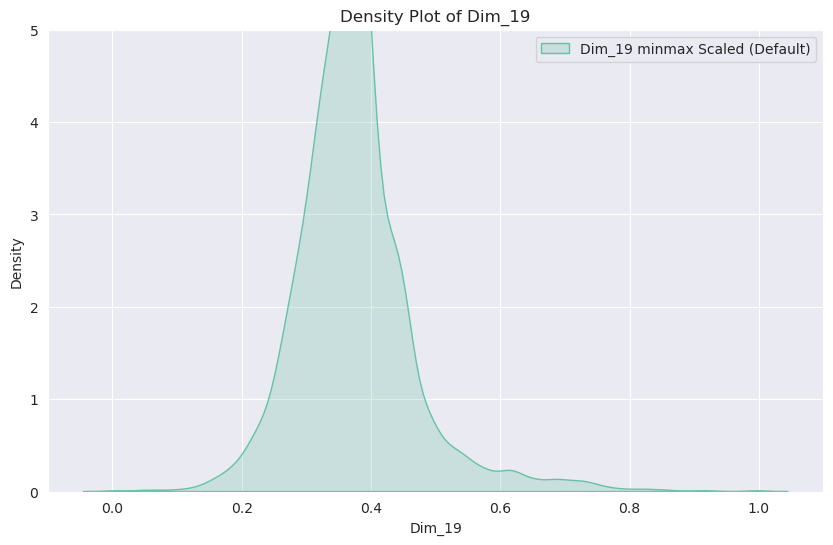

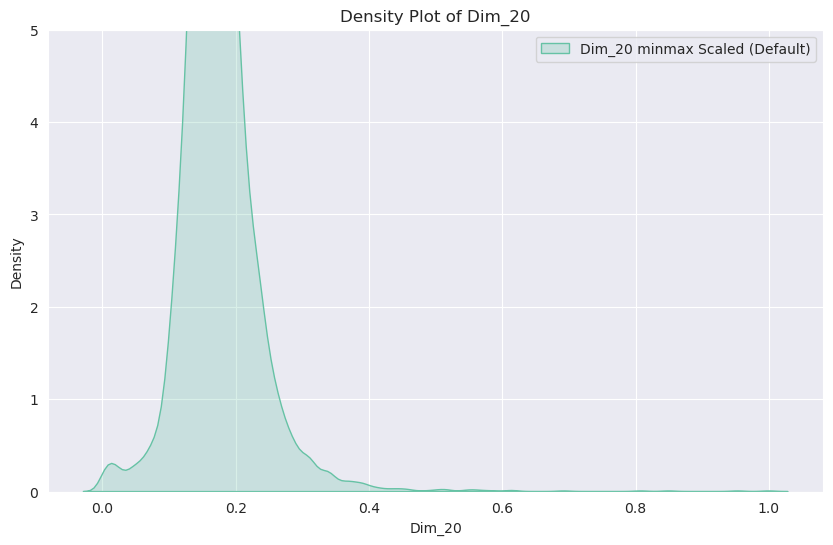

In [15]:
for column in filter(lambda col: col[-2:] != '=0', df_raw.columns):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df_raw[column], fill=True, common_norm=False, label=f'{column} minmax Scaled (Default)')
    #sns.kdeplot(df[column], fill=True, common_norm=False, label=f'{column} RobustScaled')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    #plt.xlim(-1, 2)
    plt.ylim(0, 5)
    plt.legend()
    plt.show()

# Anomaly detection

# isolation forest

In [33]:
## counterproof, isolation forest
# percentage of outliers
c = 0.05
iso_forest = IsolationForest(contamination = c) 
anomalies_from_iso = iso_forest.fit_predict(df)
pd.DataFrame(anomalies_from_iso).value_counts()

 1    6840
-1     360
Name: count, dtype: int64

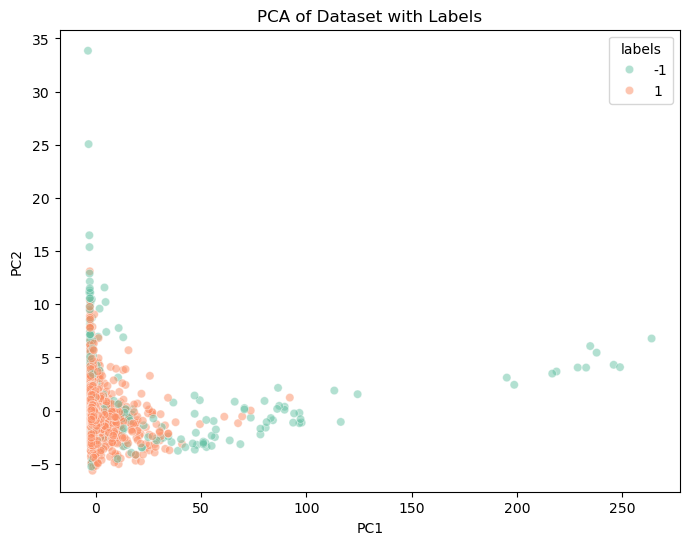

In [34]:
utils.plot_PCA(df, anomalies_from_iso)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.001s...
[t-SNE] Computed neighbors for 7200 samples in 0.302s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.463133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.846405
[t-SNE] KL divergence after 1000 iterations: 1.694369


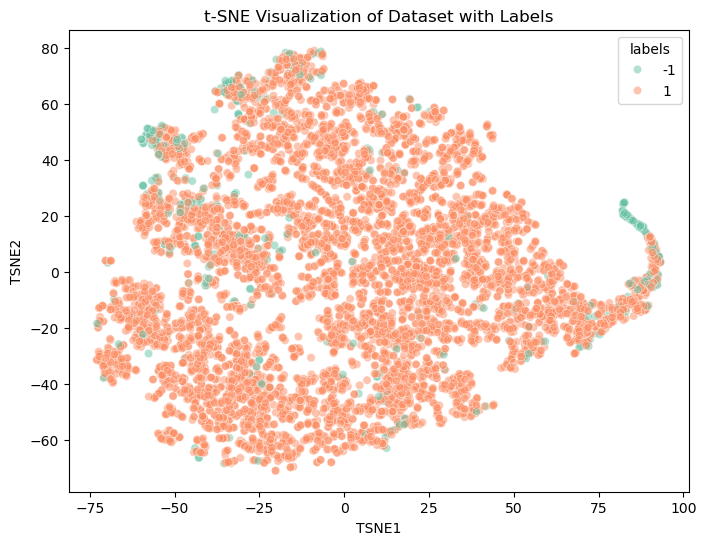

In [35]:
utils.plot_TSNE(df, anomalies_from_iso)

# Autoencoder

In [36]:
import torch
from torch import nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
import torchsummary

In [37]:
df = df_raw.copy(deep= True)

In [38]:
df.shape

(7200, 21)

In [39]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()    
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(in_features= 21 , out_features=16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 4)  
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, 21)
        )
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [40]:
model = Autoencoder()
#criterion = utils.MixedLoss()
criterion = nn.MSELoss()
importlib.reload(utils)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=500, gamma=0.1)
torchsummary.summary(model);

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       352
|    └─ReLU: 2-2                         --
|    └─Linear: 2-3                       136
|    └─ReLU: 2-4                         --
|    └─Linear: 2-5                       36
├─Sequential: 1-2                        --
|    └─Linear: 2-6                       40
|    └─ReLU: 2-7                         --
|    └─Linear: 2-8                       144
|    └─ReLU: 2-9                         --
|    └─Linear: 2-10                      357
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0


In [1]:
data_tensor = torch.tensor(df.to_numpy(), dtype=torch.float32)

NameError: name 'torch' is not defined

In [ ]:
epochs = 3000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(data_tensor)
    loss = criterion(outputs, data_tensor)
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    # Step the scheduler
    scheduler.step()
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, LR: {scheduler.get_last_lr()[0]}')


In [ ]:
model.eval()
test_output = model(data_tensor)

index = 1
index = 1626
index = 25
# Plot original and reconstructed data
original_data = data_tensor.numpy()[index]
reconstructed_data = test_output.detach().numpy()[index]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
axes[0].plot(original_data, 'b')
axes[0].set_title('Original Data')
axes[1].plot(reconstructed_data, 'r')
axes[1].set_title('Reconstructed Data')
plt.show()

In [ ]:
# Create the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Reshape the 1D arrays to 2D (1 x number of elements)
original_data_2d = original_data.reshape(1, -1)
reconstructed_data_2d = reconstructed_data.reshape(1, -1)

# Heatmap for original data
cax1 = axes[0].imshow(original_data_2d, cmap='viridis', aspect='auto')
axes[0].set_title('Original Data')
# fig.colorbar(cax1, ax=axes[0])

# Heatmap for reconstructed data
cax2 = axes[1].imshow(reconstructed_data_2d, cmap='viridis', aspect='auto')
axes[1].set_title('Reconstructed Data')
# fig.colorbar(cax2, ax=axes[[1]])
fig.colorbar(cax1, ax=axes, orientation='vertical')
# Display the plot
plt.show()

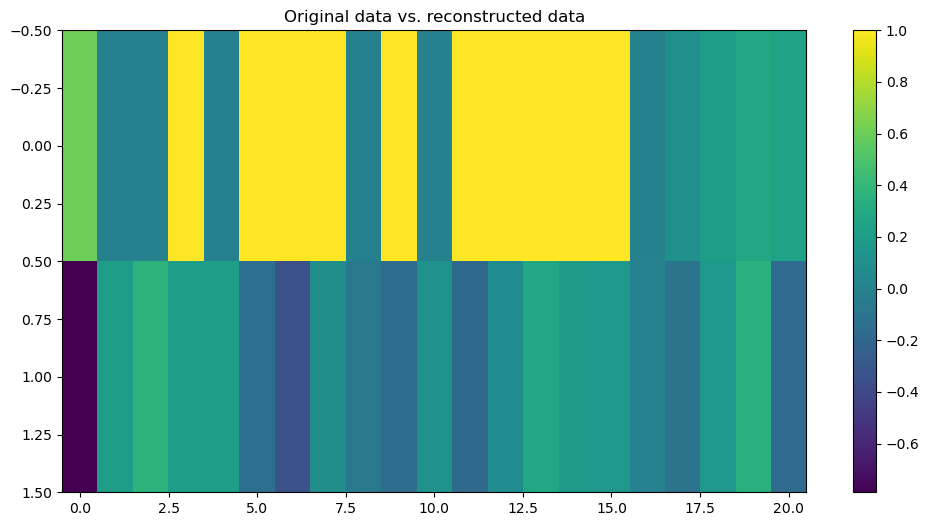

In [285]:
plt.figure(figsize=(12, 6))
combined_data = np.row_stack([original_data, reconstructed_data])
image = plt.imshow(combined_data, cmap='viridis', aspect='auto')
plt.colorbar(image, orientation='vertical')
plt.title("Original data vs. reconstructed data")
plt.show()

In [286]:
np.sum(np.abs(data_tensor.numpy()[index]**2 - test_output.detach().numpy()[index]**2))

10.202361

In [287]:
data_tensor.numpy()[3]

array([0.65625 , 0.      , 1.      , 1.      , 1.      , 1.      ,
       1.      , 1.      , 1.      , 1.      , 1.      , 1.      ,
       1.      , 1.      , 1.      , 1.      , 0.001698, 0.091922,
       0.125418, 0.337963, 0.129688], dtype=float32)

In [275]:
pd.DataFrame(data_tensor.numpy())[0].value_counts()

0
0.614583    169
0.625000    158
0.604167    157
0.739583    157
0.635417    150
           ... 
0.041667      2
1.000000      2
0.526042      1
0.052083      1
0.083333      1
Name: count, Length: 98, dtype: int64

In [276]:
df.iloc[:,1].value_counts()

Dim_1=0
1    5009
0    2191
Name: count, dtype: int64

In [277]:
df.head()

,Dim_0,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,...,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0,Dim_16,Dim_17,Dim_18,Dim_19,Dim_20
0,0.750000,1,0,1,1,1,1,1,0,1,...,1,1,1,1,1,0.001132,0.080780,0.197324,0.300926,0.225000
1,0.239583,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.164345,0.235786,0.537037,0.165625
2,0.479167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.003585,0.130919,0.167224,0.527778,0.118750
3,0.656250,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.001698,0.091922,0.125418,0.337963,0.129688
4,0.229167,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.000472,0.142061,0.229097,0.337963,0.235938


In [278]:
df.dtypes

Dim_0       float64
Dim_1=0       int64
Dim_2=0       int64
Dim_3=0       int64
Dim_4=0       int64
Dim_5=0       int64
Dim_6=0       int64
Dim_7=0       int64
Dim_8=0       int64
Dim_9=0       int64
Dim_10=0      int64
Dim_11=0      int64
Dim_12=0      int64
Dim_13=0      int64
Dim_14=0      int64
Dim_15=0      int64
Dim_16      float64
Dim_17      float64
Dim_18      float64
Dim_19      float64
Dim_20      float64
dtype: object

In [279]:
binaries = [c for c in df.columns if c[-2:] == '=0']

In [280]:
np.argmax(np.sum((df[binaries] == 0).to_numpy(), axis = 1))

1626

In [281]:
np.sum((df[binaries] == 0).to_numpy(), axis = 1)[1626]

5

In [282]:
np.argmin(np.sum((df[binaries] == 0).to_numpy(), axis = 1))

1

In [216]:
np.sum(np.abs(data_tensor.numpy()[index]**2 - test_output.detach().numpy()[index]**2))

23.113163

In [357]:
original_data = data_tensor.numpy()
reconstructed_data = test_output.detach().numpy()
differences = []
for i in range(original_data.shape[0]):
    # TODO use a better difference for mixed binary/float values, not this
    differences.append(utils.dist(pd.DataFrame(original_data[i]), 
                                 pd.DataFrame(reconstructed_data[i])))

/home/ronin/miniforge3/envs/ai/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [222]:
diff_df = pd.DataFrame(differences, columns=['diff'])
diff_df['index'] = pd.DataFrame(list(range(len(differences))), columns=['index'])

In [219]:
sorted = diff_df.sort_values('diff', ascending=False)

In [116]:
prova = (sorted[sorted['diff'] > 50]['index']).to_numpy()
treshold = len(prova) - 1
discarded = len(prova)/len(sorted) * 100
print(f"flagging as outliers {discarded}% of data")

flagging as outliers 0.8333333333333334% of data


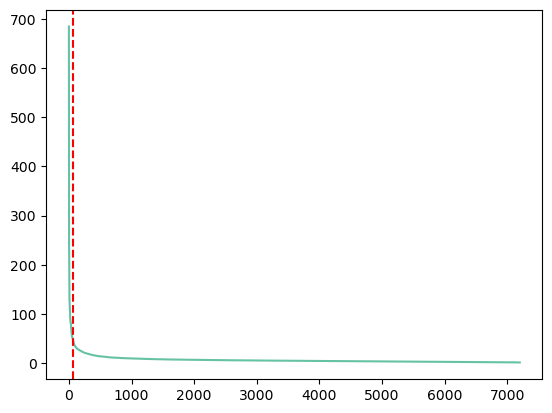

In [117]:
plt.plot(list(range(len(differences))), sorted['diff'], )
plt.axvline(x=treshold, color='r', linestyle='--', label='Vertical Line at x=5')

In [118]:
prova.shape

(60,)

In [119]:
provaindex = [-1 if i in prova else 1 for i in range(original_data.shape[0])]

In [120]:
pd.DataFrame(np.sum
             (np.abs
              (df[binaries].iloc[prova,:] - 1), 
              axis = 1)).describe()

,0
count,60.000000
mean,0.616667
std,0.715250
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,3.000000


In [121]:
pd.DataFrame(np.sum
             (np.abs
              (df[binaries] - 1), 
              axis = 1)).describe()

,0
count,7200.000000
mean,0.772778
std,0.763112
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,5.000000


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7200 samples in 0.001s...
[t-SNE] Computed neighbors for 7200 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7200
[t-SNE] Computed conditional probabilities for sample 2000 / 7200
[t-SNE] Computed conditional probabilities for sample 3000 / 7200
[t-SNE] Computed conditional probabilities for sample 4000 / 7200
[t-SNE] Computed conditional probabilities for sample 5000 / 7200
[t-SNE] Computed conditional probabilities for sample 6000 / 7200
[t-SNE] Computed conditional probabilities for sample 7000 / 7200
[t-SNE] Computed conditional probabilities for sample 7200 / 7200
[t-SNE] Mean sigma: 0.035785
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.330078
[t-SNE] KL divergence after 1000 iterations: 0.904557


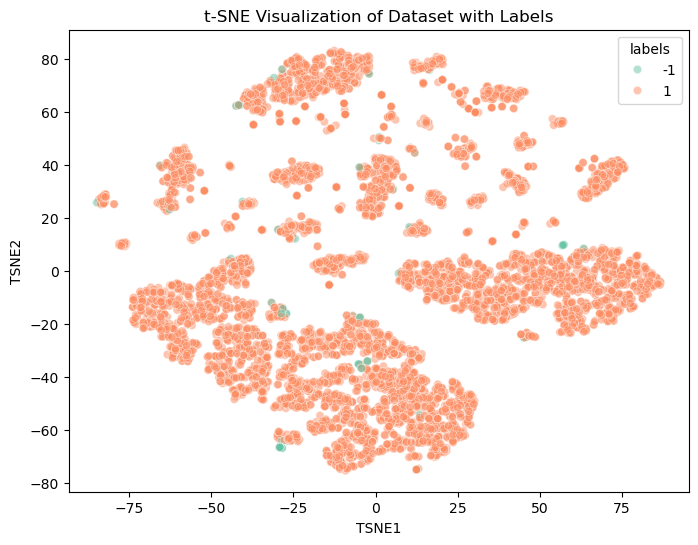

In [122]:
utils.plot_TSNE(df_raw, provaindex )

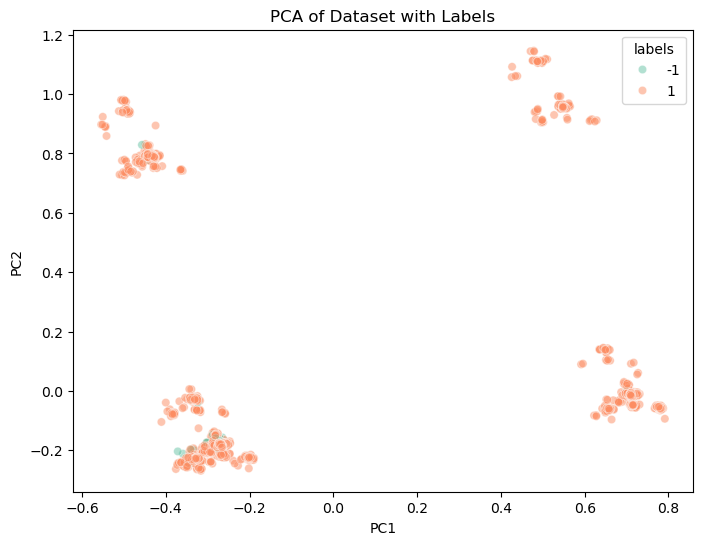

In [123]:
utils.plot_PCA(df_raw, provaindex)

In [ ]:
pd.DataFrame(provaindex).value_counts()

In [ ]:
pd.DataFrame(anomalies_from_iso).value_counts()

In [ ]:
counts = 0
for i in range(len(provaindex)):
    if provaindex[i] == anomalies_from_iso[i]:
        if provaindex[i] == -1:
            counts += 1
print(counts)

In [ ]:
a = counts/(pd.DataFrame(provaindex).value_counts()[-1])
b = counts/(pd.DataFrame(anomalies_from_iso).value_counts()[-1])
print(f"{a:2f} of auto encoder, {b:1f} of isolation forest")

# DBSCAN

# gower Distance

In [ ]:
dm = gower.gower_matrix(df)

In [ ]:
dm.shape

In [ ]:
upper_tri_indices = np.triu_indices(dm.shape[0], k=1)

# Extract the upper triangular part without the diagonal
upper_tri_distances = dm[upper_tri_indices]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(upper_tri_distances, bins=1000, alpha=0.7)
plt.title('Histogram of Distance Matrix Values')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

image = plt.imshow(dm[:20,:20], cmap='hot', aspect='equal')

plt.colorbar(image)

In [ ]:
# DBSCAN, Local Outlier Factor

In [44]:
binaries = [i for i in df.columns if i[-2:] == '=0']

In [46]:
df[binaries].replace(0, -1)

,Dim_1=0,Dim_2=0,Dim_3=0,Dim_4=0,Dim_5=0,Dim_6=0,Dim_7=0,Dim_8=0,Dim_9=0,Dim_10=0,Dim_11=0,Dim_12=0,Dim_13=0,Dim_14=0,Dim_15=0
0,-1,0,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
7196,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7197,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
7198,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [47]:
df.columns

Index(['Dim_0', 'Dim_1=0', 'Dim_2=0', 'Dim_3=0', 'Dim_4=0', 'Dim_5=0',
       'Dim_6=0', 'Dim_7=0', 'Dim_8=0', 'Dim_9=0', 'Dim_10=0', 'Dim_11=0',
       'Dim_12=0', 'Dim_13=0', 'Dim_14=0', 'Dim_15=0', 'Dim_16', 'Dim_17',
       'Dim_18', 'Dim_19', 'Dim_20'],
      dtype='object')

In [62]:
df.iloc[:,14].astype('category').value_counts()

Dim_14=0
1    7199
0       1
Name: count, dtype: int64

In [ ]:
562.71